<a href="https://colab.research.google.com/github/stevearonson/VB-Video-Tracking/blob/master/Detectron2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 20.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=e80aae37456e94426ab6099df1e35c0ecdf7c75de40006a87453dfa520cd4012
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 711kB/s 
     |████████████████████████████████| 2.2MB 24.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210204-cp36-none-any.whl size=44945 sha256=6fd2a990e18579c393615f680e04e4d07e13afe7fb09ec71736d897774ff19ca
  Stored in directory: /root/.cache/pip/wheels/7a/d5/3d/1393f94e0a0c6345f674387da5bd382c9aba98a23371a3804e
  Created wheel for iopath: filename=iopath-0.1.3-cp36-none-any.whl size=11169 sha256=b360497d34161e07cc017f6c7705947a7aeacf35f0ab305e858084b5c6a63ae2
  Stored in directory: /root/.cache/pip/wheels/a9/1d/55/94a55e032409ac7617f9cbb88a0fa2cf4e7208806c29730804
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.

In [1]:
!pip uninstall -y opencv-python-headless opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-opencv
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 534 kB of archives.
After this operation, 2,941 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 534 kB in 1s (924 kB/s)
Selecting previously unselected package python3-opencv.
(Reading database ... 146442 files and directories currently installed.)
Preparing to unpack .../python3-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
     |████████████████████████████████| 5.7MB 15.6MB/s 
     |████████████████████████████████| 112kB 58.6MB

In [1]:
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 10195 (delta 11), reused 16 (delta 4), pack-reused 10154
Receiving objects: 100% (10195/10195), 4.22 MiB | 26.68 MiB/s, done.
Resolving deltas: 100% (7382/7382), done.


In [2]:
!ls detectron2/configs/COCO-Detection/

faster_rcnn_R_101_C4_3x.yaml   faster_rcnn_R_50_FPN_3x.yaml
faster_rcnn_R_101_DC5_3x.yaml  faster_rcnn_X_101_32x8d_FPN_3x.yaml
faster_rcnn_R_101_FPN_3x.yaml  fast_rcnn_R_50_FPN_1x.yaml
faster_rcnn_R_50_C4_1x.yaml    retinanet_R_101_FPN_3x.yaml
faster_rcnn_R_50_C4_3x.yaml    retinanet_R_50_FPN_1x.yaml
faster_rcnn_R_50_DC5_1x.yaml   retinanet_R_50_FPN_3x.yaml
faster_rcnn_R_50_DC5_3x.yaml   rpn_R_50_C4_1x.yaml
faster_rcnn_R_50_FPN_1x.yaml   rpn_R_50_FPN_1x.yaml


In [3]:
from google.colab import drive
drive.mount('/gdrive')
vbfolder = r'/gdrive/My Drive/VB/Video/'
!ls "{vbfolder}"

Mounted at /gdrive
 ball_tracker.mp4	      DetectionVB.jpg		 OpenCV.ipynb
 Cheshire_Halasz_Perin	      image			 panopt.mp4
 Cheshire_Halasz_Perin.pdf    img			 people.mp4
'CHVC M6 S3.mp4'	      input.jpg			 player_pos.csv
 ckpt.t7		      input.mp4			 tracker.mp4
 court-diagram.jpg	      InstanceSegmentation.jpg	 tracker_trails.jpg
 court-diagram-vertical.jpg   Keypoints.jpg		 Untitled.ipynb
 demo.avi		      Keypoints.mkv		 vbdetection.pth
 Detection.jpg		     'MBVF M7 S3.mp4'		 video-clip.mp4
 Detection.mkv		      model_final.pth		 voc2coco.py


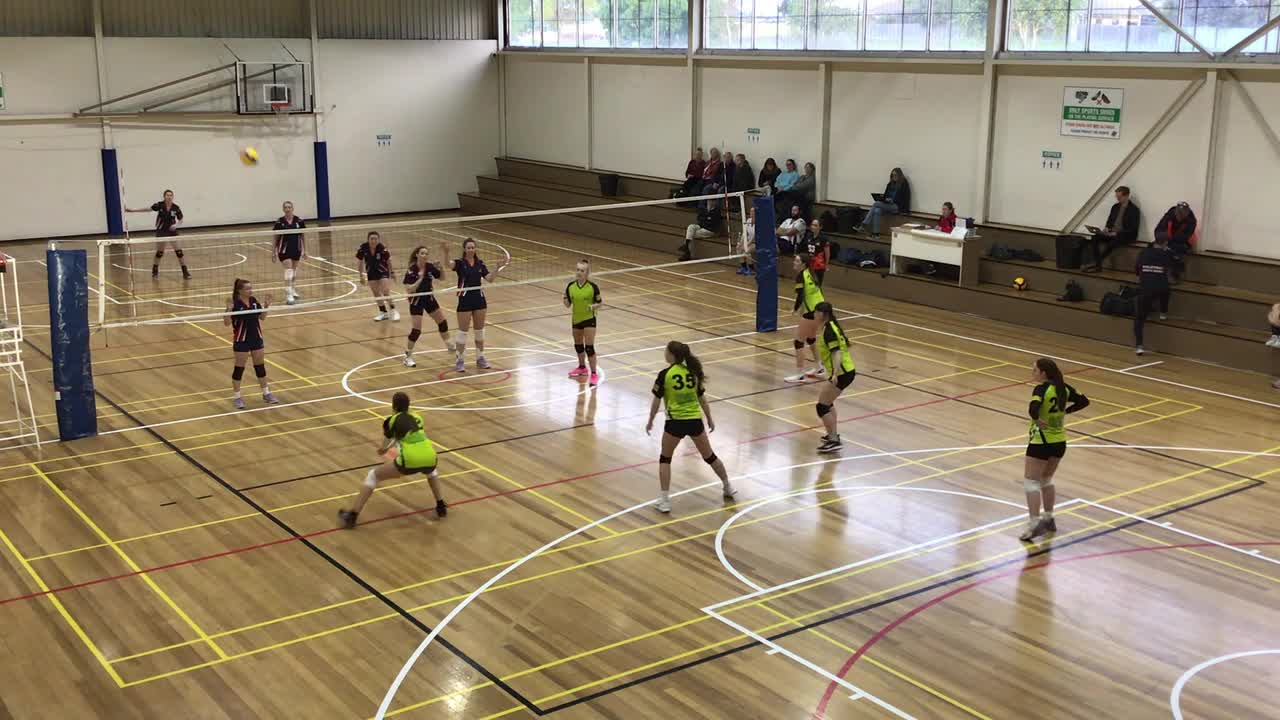

In [4]:
import os, json, cv2
from google.colab.patches import cv2_imshow
im = cv2.imread(vbfolder + "input.jpg")
cv2_imshow(im)

In [5]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"Detection.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/09 22:00:17 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl'], output='/gdrive/My Drive/VB/Video/Detection.jpg', video_input=None, webcam=False)
[02/09 22:00:28 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
model_final_280758.pkl: 167MB [00:07, 22.9MB/s]               
[02/09 22:00:35 fvcore.common.checkpoint]: R

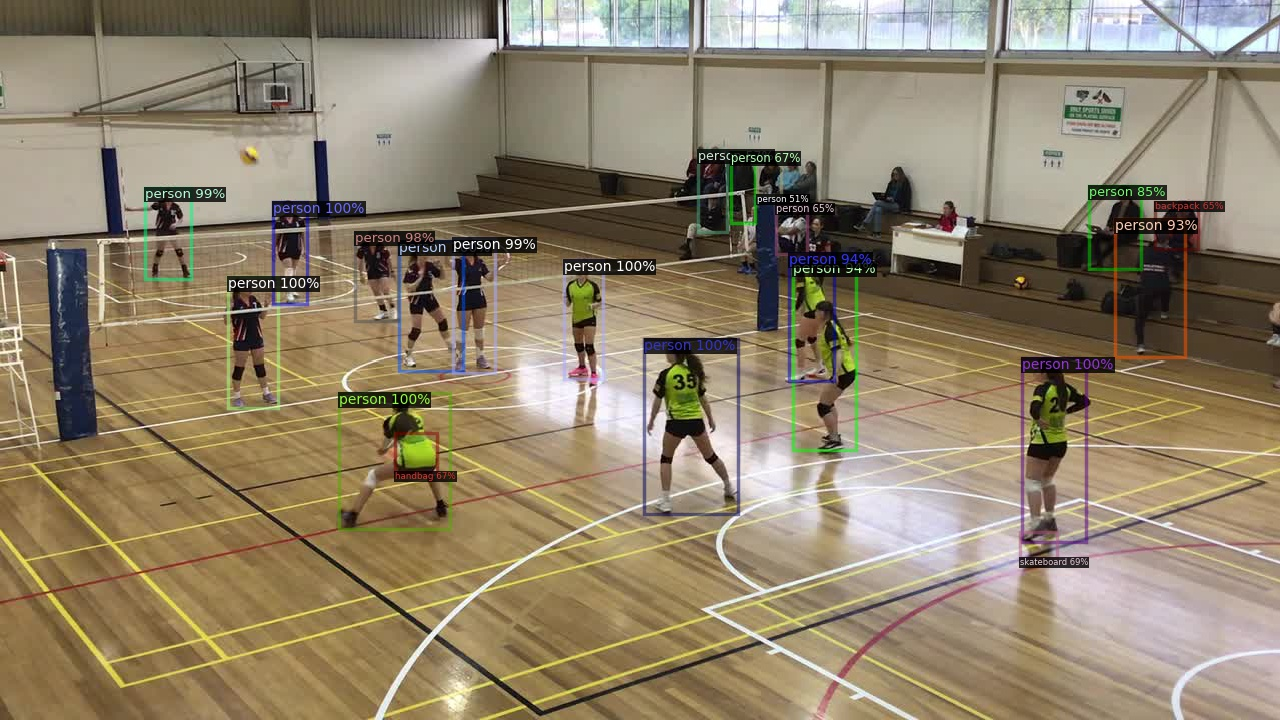

In [6]:
im = cv2.imread(vbfolder + "Detection.jpg")
cv2_imshow(im)

In [7]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"InstanceSegmentation.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/09 22:00:49 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='/gdrive/My Drive/VB/Video/InstanceSegmentation.jpg', video_input=None, webcam=False)
[02/09 22:00:54 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
model_final_f10217.pkl: 178MB [00:08, 21.9MB/s]               
[02/09

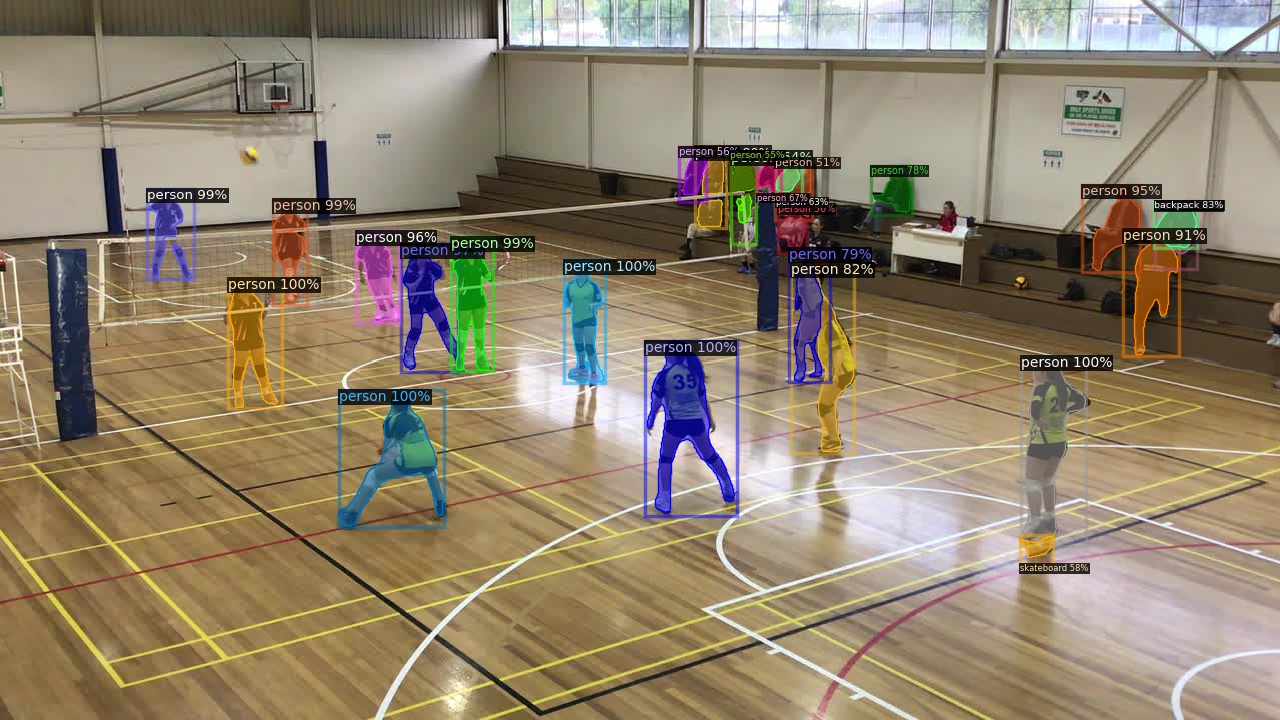

In [8]:
im = cv2.imread(vbfolder + "InstanceSegmentation.jpg")
cv2_imshow(im)

In [9]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"Keypoints.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/09 22:01:20 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='/gdrive/My Drive/VB/Video/Keypoints.jpg', video_input=None, webcam=False)
[02/09 22:01:26 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
model_final_a6e10b.pkl: 237MB [00:09, 24.3MB/s]               
[02/09 22:01:35 fvcore.common.checkpoi

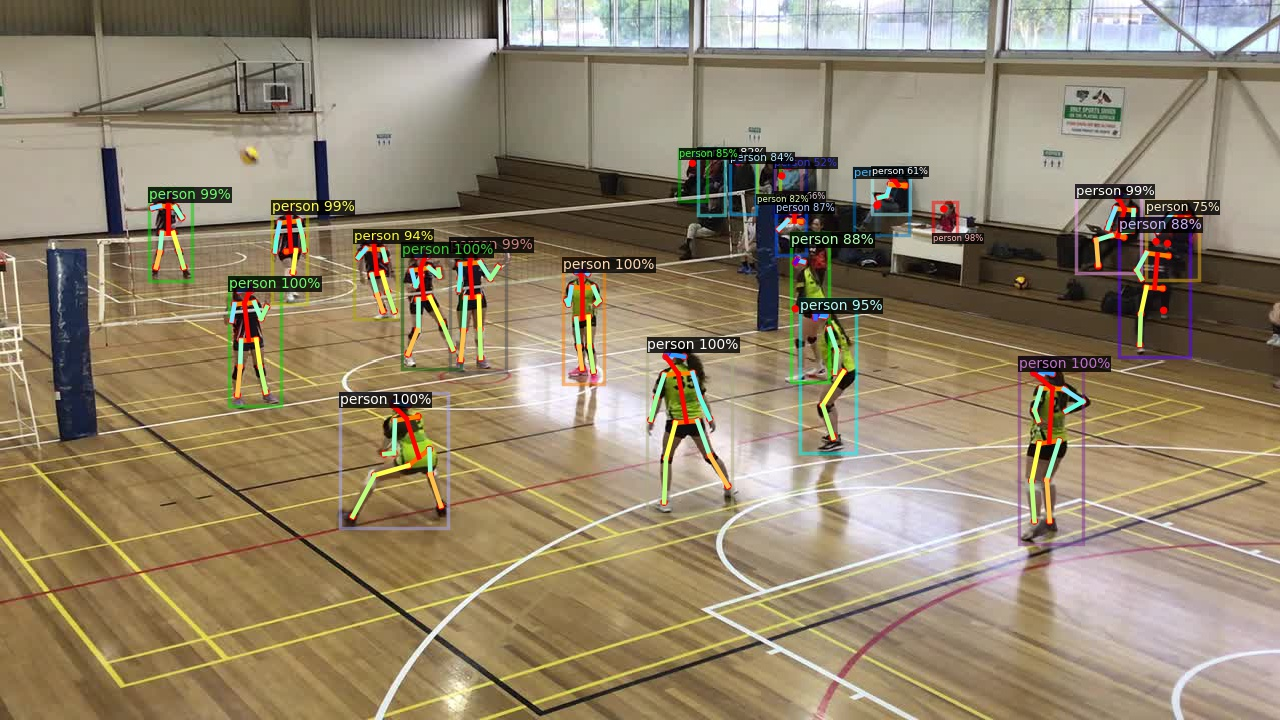

In [10]:
im = cv2.imread(vbfolder + "Keypoints.jpg")
cv2_imshow(im)

In [ ]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"Keypoints.mkv \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/04 20:04:25 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='/gdrive/My Drive/VB/Video/Keypoints.mkv', video_input='/gdrive/My Drive/VB/Video/input.mp4', webcam=False)
[02/04 20:04:30 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
[02/04 20:04:30 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/354 [00:00

In [ ]:
# Use detection only on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"Detection.mkv \
    --opts MODEL.WEIGHTS detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl \

Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/07 18:52:09 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl'], output='/gdrive/My Drive/VB/Video/Detection.mkv', video_input='/gdrive/My Drive/VB/Video/input.mp4', webcam=False)
[02/07 18:52:14 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
[02/07 18:52:14 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/354 [00:00<?, ?i

## Custom Train on Volleyball Image Dataset

In [11]:
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer



** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [12]:
register_coco_instances("volleyball", {}, vbfolder + 'img/output.json', vbfolder + 'img')

In [13]:
ball_metadata = MetadataCatalog.get("volleyball")
dataset_dicts = DatasetCatalog.get("volleyball")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [14]:
ball_metadata

Metadata(evaluator_type='coco', image_root='/gdrive/My Drive/VB/Video/img', json_file='/gdrive/My Drive/VB/Video/img/output.json', name='volleyball', thing_classes=['volleyball'], thing_dataset_id_to_contiguous_id={0: 0})

In [26]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("volleyball",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")   # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
#cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.MAX_ITER = 2000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[02/09 22:16:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.


[02/09 22:17:05 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:217: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  num_fg = fg_inds.nonzero().numel()


[02/09 22:17:15 d2.utils.events]:  eta: 0:15:19  iter: 19  total_loss: 0.9557  loss_cls: 0.7037  loss_box_reg: 0.06082  loss_rpn_cls: 0.127  loss_rpn_loc: 0.03469  time: 0.4650  data_time: 0.0249  lr: 1.9981e-05  max_mem: 2641M
[02/09 22:17:24 d2.utils.events]:  eta: 0:15:26  iter: 39  total_loss: 0.826  loss_cls: 0.5188  loss_box_reg: 0.09785  loss_rpn_cls: 0.1164  loss_rpn_loc: 0.02701  time: 0.4702  data_time: 0.0047  lr: 3.9961e-05  max_mem: 2641M
[02/09 22:17:33 d2.utils.events]:  eta: 0:15:22  iter: 59  total_loss: 0.5865  loss_cls: 0.3229  loss_box_reg: 0.103  loss_rpn_cls: 0.1168  loss_rpn_loc: 0.06136  time: 0.4692  data_time: 0.0052  lr: 5.9941e-05  max_mem: 2641M
[02/09 22:17:43 d2.utils.events]:  eta: 0:15:13  iter: 79  total_loss: 0.4359  loss_cls: 0.1943  loss_box_reg: 0.06615  loss_rpn_cls: 0.08542  loss_rpn_loc: 0.03279  time: 0.4680  data_time: 0.0048  lr: 7.9921e-05  max_mem: 2641M
[02/09 22:17:52 d2.utils.events]:  eta: 0:15:10  iter: 99  total_loss: 0.41  loss_cls: 

In [27]:
# save trained model weights to video directoruy
!mv -f ./output/model_final.pth "{vbfolder}"vbdetection.pth

In [28]:
!ls "{vbfolder}"

 ball_tracker.mp4	      DetectionVB.jpg		 OpenCV.ipynb
 Cheshire_Halasz_Perin	      image			 panopt.mp4
 Cheshire_Halasz_Perin.pdf    img			 people.mp4
'CHVC M6 S3.mp4'	      input.jpg			 player_pos.csv
 ckpt.t7		      input.mp4			 tracker.mp4
 court-diagram.jpg	      InstanceSegmentation.jpg	 tracker_trails.jpg
 court-diagram-vertical.jpg   Keypoints.jpg		 Untitled.ipynb
 demo.avi		      Keypoints.mkv		 vbdetection.pth
 Detection.jpg		     'MBVF M7 S3.mp4'		 video-clip.mp4
 Detection.mkv		      model_final.pth		 voc2coco.py


In [29]:
!ls output

events.out.tfevents.1612909021.72472bee135f.206.0  metrics.json
last_checkpoint


In [33]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --input "{vbfolder}"input.jpg \
    --output "{vbfolder}"DetectionVB.jpg \
    --opts MODEL.WEIGHTS "{vbfolder}"vbdetection.pth \
    DATASETS.TEST "('volleyball', )" \
    MODEL.ROI_HEADS.NUM_CLASSES 1


Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/09 22:35:55 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=['/gdrive/My Drive/VB/Video/input.jpg'], opts=['MODEL.WEIGHTS', '/gdrive/My Drive/VB/Video/vbdetection.pth', 'DATASETS.TEST', "('volleyball', )", 'MODEL.ROI_HEADS.NUM_CLASSES', '1'], output='/gdrive/My Drive/VB/Video/DetectionVB.jpg', video_input=None, webcam=False)
[02/09 22:36:00 fvcore.common.checkpoint]: Loading checkpoint from /gdrive/My Drive/VB/Video/vbdetection.pth
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWa

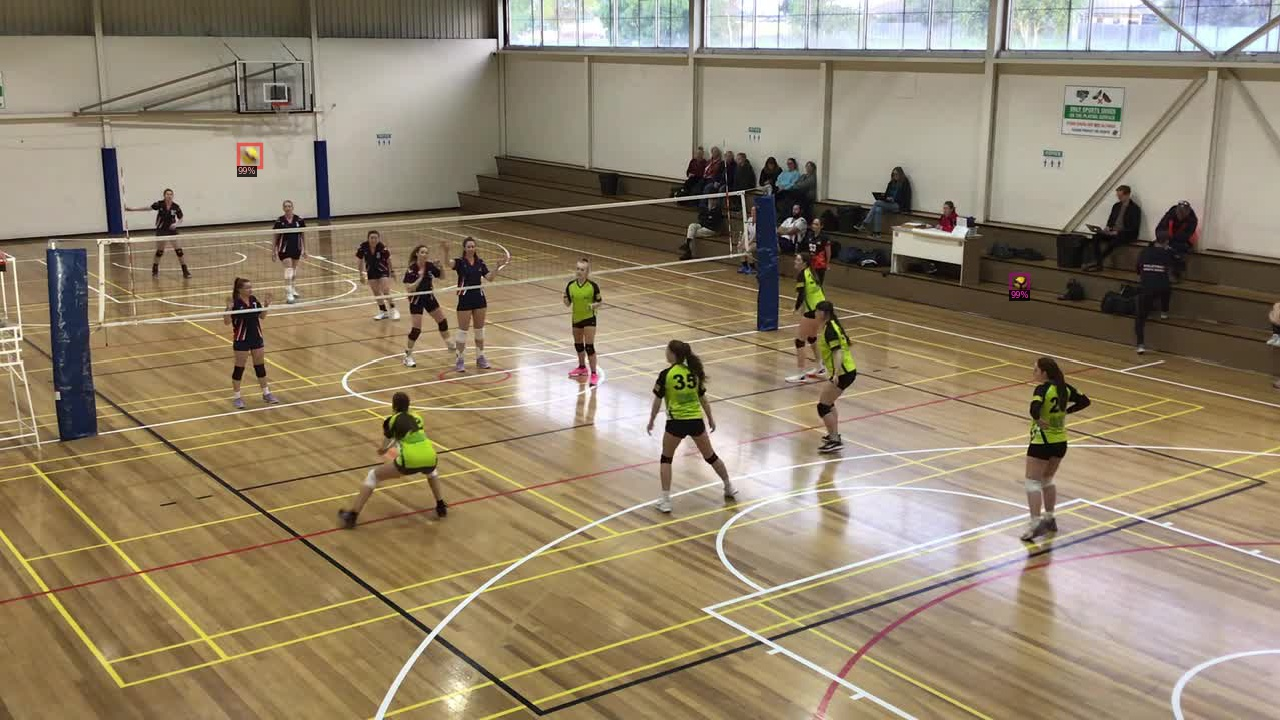

In [34]:
im = cv2.imread(vbfolder + "DetectionVB.jpg")
cv2_imshow(im)

In [35]:
# Use detection only on sample video
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml \
    --video-input "{vbfolder}"input.mp4 \
    --output "{vbfolder}"DetectionVB.mkv \
    --opts MODEL.WEIGHTS "{vbfolder}"vbdetection.pth \
    DATASETS.TEST "('volleyball', )" \
    MODEL.ROI_HEADS.NUM_CLASSES 1


Failed to load OpenCL runtime
** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/09 22:37:38 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', '/gdrive/My Drive/VB/Video/vbdetection.pth', 'DATASETS.TEST', "('volleyball', )", 'MODEL.ROI_HEADS.NUM_CLASSES', '1'], output='/gdrive/My Drive/VB/Video/DetectionVB.mkv', video_input='/gdrive/My Drive/VB/Video/input.mp4', webcam=False)
[02/09 22:37:43 fvcore.common.checkpoint]: Loading checkpoint from /gdrive/My Drive/VB/Video/vbdetection.pth
  0% 0/354 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWa